# Mandelbrot parallel computation

In [2]:
from IPython.parallel import Client
rc = Client()
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [3]:
dv = rc[:]
dv

<DirectView [0, 1, 2, 3,...]>

In [4]:
lv = rc.load_balanced_view()
lv

<LoadBalancedView None>

In [5]:
import numpy as np

@dv.parallel(block = True)
def mandel2(x, y, max_iters=80):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

In [6]:
x = np.arange(-2, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)

In [7]:
def mandel1(x, y, max_iters=80):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

In [8]:
%%time
im1 = np.reshape(list(map(mandel1, X.ravel(), Y.ravel())), (len(y), len(x)))

CPU times: user 624 ms, sys: 3.02 ms, total: 627 ms
Wall time: 622 ms


In [9]:
%%time
im2 = np.reshape(mandel2.map(X.ravel(), Y.ravel()),  (len(y), len(x)))

CPU times: user 138 ms, sys: 25.2 ms, total: 163 ms
Wall time: 452 ms


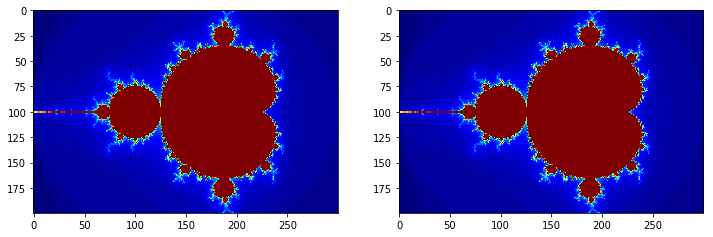

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].grid(False)
axes[0].imshow(im1, cmap='jet')
axes[1].grid(False)
axes[1].imshow(im2, cmap='jet')
pass